# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [24]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [13]:
df_raw.describe(exclude=None)

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because the GRE Scores are out of 800 total, and GPA is out of 4 total, so we can expect the standard deviation to be a higher number for GRE scores, reflecting the same kind of distribution.

#### Question 4. Drop data points with missing data


In [17]:
df = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [18]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: By counting the null values in the new dataframe without null values: isnull().sum()

#### Question 6. Create box plots for GRE and GPA

/Users/asmith/Documents/school/env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x10ccdf9d0>],
 'caps': [<matplotlib.lines.Line2D at 0x10cd347d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x10cd42ad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10cd42490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10ccdf710>,
  <matplotlib.lines.Line2D at 0x10cd34190>]}

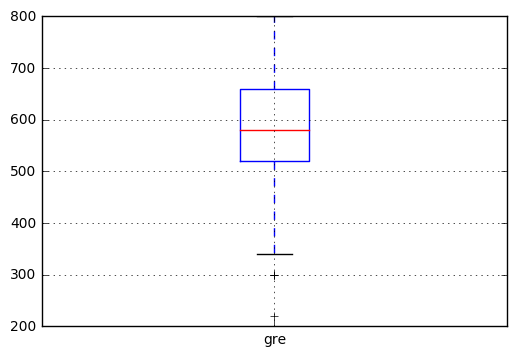

In [20]:
#boxplot 1
df.boxplot(column='gre')

/Users/asmith/Documents/school/env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x10ce12b10>],
 'caps': [<matplotlib.lines.Line2D at 0x10ce22a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x10ce2ed10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10ce2e6d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10ce12cd0>,
  <matplotlib.lines.Line2D at 0x10ce223d0>]}

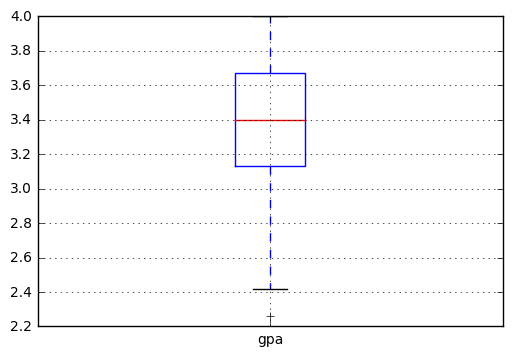

In [22]:
#boxplot 2 
df.boxplot(column='gpa')

#### Question 7. What do this plots show?

Answer: Both charts have slightly longer tails toward the lower numbers, with one or more low outliers

#### Question 8. Describe each distribution 

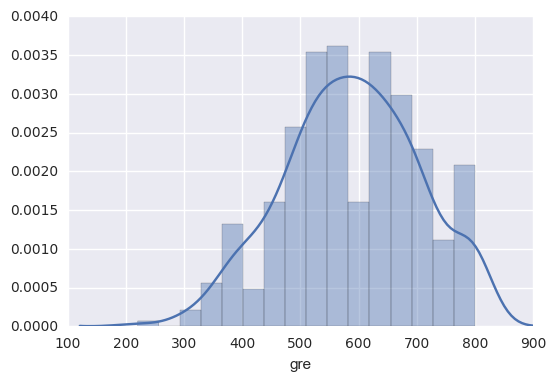

In [28]:
# plot the distribution of each variable 
sns.distplot(df['gre'])

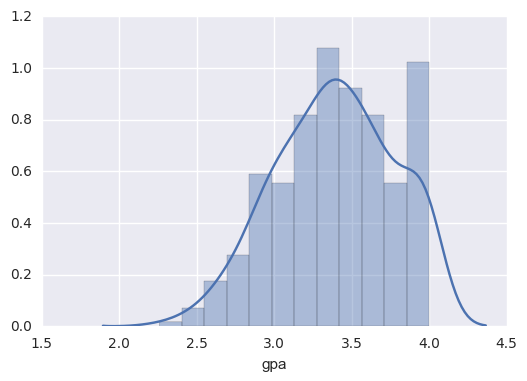

In [29]:
sns.distplot(df['gpa'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [33]:
print df['gre'].skew()
print df['gre'].kurt()

-0.146046988216
-0.332864354651


In [34]:
print df['gpa'].skew()
print df['gpa'].kurt()

-0.216888932969
-0.563569899522


Answer: No. Normal skew is 0, and normal kurt() (in this case, excess kurtosis) is 0.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, both distributions account for data points over 4 and 800 for gpa and gre respectively, when assuming normal scores this is not possible

#### Question 11. Which of our variables are potentially colinear? 

In [35]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: No columns seem that closely correlated, according to the above matrix

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:
1. plot the two columns against each other to see if there are any obvious insights from the distribution of the data
2. calculate the correlation coefficient (should be -0.24 as per the above table)

#### Question 14. What is your hypothesis? 

Answer: My hypothesis would have been that higher prestige levels of undergraduate schools would correlate to higher grad school admissions, but it looks like from this data set that there is a negative correlation.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data